In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
raw_churn_cols = raw_churn_cols = ['CUSTOMER_ID', 'GENDER', 'SENIOR_CITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONE_SERVICE', 'MULTIPLE_LINES', 'INTERNET_SERVICE',
       'ONLINE_SECURITY', 'ONLINE_BACKUP', 'DEVICE_PROTECTION', 'TECH_SUPPORT',
       'STREAMING_TV', 'STREAMING_MOVIES', 'CONTACT', 'PAPERLESS_BILLING',
       'PAYMENT_METHOD', 'MONTHLY_CHARGES', 'TOTAL_CHARGES', 'CHURN']

In [5]:
df_raw_churn = pd.read_csv('./data/telco_customer_churn.csv', skiprows = 1, header = None, names = raw_churn_cols, low_memory = False)

In [6]:
df_raw_churn.head()

,CUSTOMER_ID,GENDER,SENIOR_CITIZEN,PARTNER,DEPENDENTS,TENURE,PHONE_SERVICE,MULTIPLE_LINES,INTERNET_SERVICE,ONLINE_SECURITY,ONLINE_BACKUP,DEVICE_PROTECTION,TECH_SUPPORT,STREAMING_TV,STREAMING_MOVIES,CONTACT,PAPERLESS_BILLING,PAYMENT_METHOD,MONTHLY_CHARGES,TOTAL_CHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_churn = df_raw_churn.copy()

In [8]:
df_churn.shape

(7043, 21)

In [9]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CUSTOMER_ID          7043 non-null object
GENDER               7043 non-null object
SENIOR_CITIZEN       7043 non-null int64
PARTNER              7043 non-null object
DEPENDENTS           7043 non-null object
TENURE               7043 non-null int64
PHONE_SERVICE        7043 non-null object
MULTIPLE_LINES       7043 non-null object
INTERNET_SERVICE     7043 non-null object
ONLINE_SECURITY      7043 non-null object
ONLINE_BACKUP        7043 non-null object
DEVICE_PROTECTION    7043 non-null object
TECH_SUPPORT         7043 non-null object
STREAMING_TV         7043 non-null object
STREAMING_MOVIES     7043 non-null object
CONTACT              7043 non-null object
PAPERLESS_BILLING    7043 non-null object
PAYMENT_METHOD       7043 non-null object
MONTHLY_CHARGES      7043 non-null float64
TOTAL_CHARGES        7043 non-null object
CHURN                7043 non-null object
dtypes: floa

In [10]:
df_churn.columns

Index(['CUSTOMER_ID', 'GENDER', 'SENIOR_CITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONE_SERVICE', 'MULTIPLE_LINES', 'INTERNET_SERVICE',
       'ONLINE_SECURITY', 'ONLINE_BACKUP', 'DEVICE_PROTECTION', 'TECH_SUPPORT',
       'STREAMING_TV', 'STREAMING_MOVIES', 'CONTACT', 'PAPERLESS_BILLING',
       'PAYMENT_METHOD', 'MONTHLY_CHARGES', 'TOTAL_CHARGES', 'CHURN'],
      dtype='object')

In [11]:
df_churn.describe()

,SENIOR_CITIZEN,TENURE,MONTHLY_CHARGES
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Transformation

In [12]:
df_churn = df_churn[['CUSTOMER_ID', 'GENDER', 'TENURE', 'MONTHLY_CHARGES','CHURN']]

In [13]:
df_churn.head()

,CUSTOMER_ID,GENDER,TENURE,MONTHLY_CHARGES,CHURN
0,7590-VHVEG,Female,1,29.85,No
1,5575-GNVDE,Male,34,56.95,No
2,3668-QPYBK,Male,2,53.85,Yes
3,7795-CFOCW,Male,45,42.30,No
4,9237-HQITU,Female,2,70.70,Yes


In [14]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
CUSTOMER_ID        7043 non-null object
GENDER             7043 non-null object
TENURE             7043 non-null int64
MONTHLY_CHARGES    7043 non-null float64
CHURN              7043 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 275.2+ KB


# EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta

In [16]:
plt.style.use('fivethirtyeight')
%matplotlib inline


In [17]:
df_transformed_churn = df_churn.copy()

In [18]:
df_transformed_churn.head()

,CUSTOMER_ID,GENDER,TENURE,MONTHLY_CHARGES,CHURN
0,7590-VHVEG,Female,1,29.85,No
1,5575-GNVDE,Male,34,56.95,No
2,3668-QPYBK,Male,2,53.85,Yes
3,7795-CFOCW,Male,45,42.30,No
4,9237-HQITU,Female,2,70.70,Yes


In [19]:
df = df_transformed_churn.copy()

In [20]:
df.shape

(7043, 5)

In [21]:
df.columns

Index(['CUSTOMER_ID', 'GENDER', 'TENURE', 'MONTHLY_CHARGES', 'CHURN'], dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
CUSTOMER_ID        7043 non-null object
GENDER             7043 non-null object
TENURE             7043 non-null int64
MONTHLY_CHARGES    7043 non-null float64
CHURN              7043 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 275.2+ KB


## Univairant Analysis

In [23]:
df.CUSTOMER_ID.head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: CUSTOMER_ID, dtype: object

In [24]:
df.CUSTOMER_ID.isna().sum()

0

In [25]:
len(df.CUSTOMER_ID.unique())

7043

In [26]:
df.TENURE.head()

0     1
1    34
2     2
3    45
4     2
Name: TENURE, dtype: int64

In [27]:
df.TENURE.isna().sum()

0

In [28]:
len(df.TENURE.unique())

73

In [29]:
df.TENURE.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: TENURE, dtype: float64

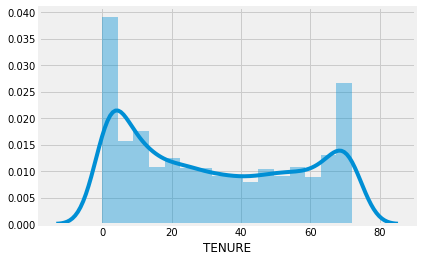

In [30]:
sns.distplot(df.TENURE, axlabel = 'TENURE')

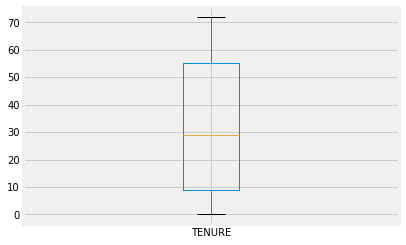

In [31]:
df.boxplot(column='TENURE', return_type = 'axes')

In [32]:

#status_order = ['YES','NO']
status_palette = ["#FF2600","#0dbd25"]
color_reg = "#0dbd25"
color_churn = "#FF2600"

sns.boxplot(x='CHURN',y='TENURE', data=df, order=status_order, palette=status_palette)
plt.show()


NameError: name 'status_order' is not defined

In [ ]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.TENURE, label='Churn', color = color_churn)
sns.distplot(df_reg.TENURE, label = 'Regular', color = color_reg)
plt.legend(labels=['Churn', 'Regular'])
plt.show()

In [ ]:
df.MONTHLY_CHARGES.head()

In [ ]:
df.MONTHLY_CHARGES.isna().sum()

In [ ]:
len(df.MONTHLY_CHARGES.unique())

In [ ]:
sns.distplot(df.MONTHLY_CHARGES, axlabel ='MONTHLY_CHARGES')

In [ ]:
df.boxplot(column = 'MONTHLY_CHARGES', return_type = 'axes')

In [ ]:
status_order=["Yes","No"]
status_palette=["#FF2600","#0dbd25"]
color_reg = "#0dbd25"
color_churn = "#FF2600"

sns.boxplot(x = 'CHURN', y = 'MONTHLY_CHARGES', data=df ,order = status_order, palette = status_palette)
plt.show()

In [ ]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.MONTHLY_CHARGES, label = 'churn', color = color_churn)
sns.distplot(df_reg.MONTHLY_CHARGES, label =  'Regular', color = color_reg)
plt.legend(labels=['Churn', 'Regular'])

In [ ]:
df.CHURN.head()

In [ ]:
df.CHURN.describe(include = ['object'])

In [ ]:
df.CHURN.value_counts().sort_index()

In [ ]:
df.CHURN.isna().sum()

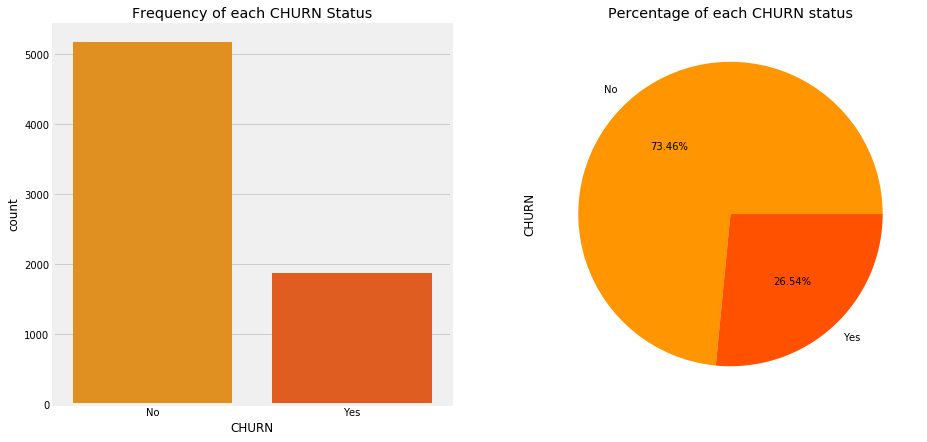

In [34]:
fig, axs = plt.subplots(1,2, figsize=(14,7))

churn_palette = ['#FF9500', '#FF5100']
sns.countplot(x = 'CHURN', data = df, ax = axs[0], palette=churn_palette)
axs[0].set_title('Frequency of each CHURN Status')

df.CHURN.value_counts().plot(x=None, y=None, kind = 'pie', ax =axs[1], autopct='%1.2f%%', colors = churn_palette)
axs[1].set_title('Percentage of each CHURN status')
plt.show()

In [35]:
churn_map = {'Yes':1, 'No':0}
df['CHURN_STATUS'] = df['CHURN'].map(churn_map)

In [36]:
df.head()

,CUSTOMER_ID,GENDER,TENURE,MONTHLY_CHARGES,CHURN,CHURN_STATUS
0,7590-VHVEG,Female,1,29.85,No,0
1,5575-GNVDE,Male,34,56.95,No,0
2,3668-QPYBK,Male,2,53.85,Yes,1
3,7795-CFOCW,Male,45,42.30,No,0
4,9237-HQITU,Female,2,70.70,Yes,1


## EDA Dummyfication